In [1]:
import numpy as np
import pandas as pd
from cheche_pm import Project
import networkx as nx

In [2]:
p = Project() # create empty project instance

p.add_activity(activity_name='A',activity_duration = 2, activity_precedence= [None], a_desc= 'Describe product')
p.add_activity(activity_name='B',activity_duration = 4, activity_precedence= [None], a_desc= 'Develop marketing strategy')
p.add_activity(activity_name='C',activity_duration = 6, activity_precedence= ['A'], a_desc= 'Design brochure')
p.add_activity(activity_name='D1',activity_duration = 80, activity_precedence= ['A'], a_desc= 'Requirements analysis')
p.add_activity(activity_name='D2',activity_duration = 120, activity_precedence= ['D1'], a_desc= 'Software design')
p.add_activity(activity_name='D3',activity_duration = 120, activity_precedence= ['D1'], a_desc= 'System design')
p.add_activity(activity_name='D4',activity_duration = 720, activity_precedence= ['D2', 'D3'], a_desc= 'Coding')
p.add_activity(activity_name='D5',activity_duration = 80, activity_precedence= ['D4'], a_desc= 'Write documentation')
p.add_activity(activity_name='D6',activity_duration = 160, activity_precedence= ['D4'], a_desc= 'Unit testing')
p.add_activity(activity_name='D7',activity_duration = 160, activity_precedence= ['D6'], a_desc= 'System testing')
p.add_activity(activity_name='D8',activity_duration = 80, activity_precedence= ['D5', 'D7'], a_desc= 'Package deliverables')
p.add_activity(activity_name='E',activity_duration = 40, activity_precedence= ['B','C'], a_desc= 'Survey potential market')
p.add_activity(activity_name='F',activity_duration = 32, activity_precedence= ['D8','E'], a_desc= 'Develop pricing plan')
p.add_activity(activity_name='G',activity_duration = 16, activity_precedence= ['A','D8'], a_desc= 'Develop implementation plan')
p.add_activity(activity_name='H',activity_duration = 24, activity_precedence= ['F','G'], a_desc= 'Write client proposal')

In [3]:
p = Project.from_excel(filename='project-plan-v003_Python.xlsx',
                      rcpsp_format=True)

/Users/albertlee/opt/anaconda3/lib/python3.9/site-packages/cheche_pm/cheche_pm.py:664: UserWarning: !WARNING: Creating Project data dictionary...
  warnings.warn("!WARNING: Creating Project data dictionary...")


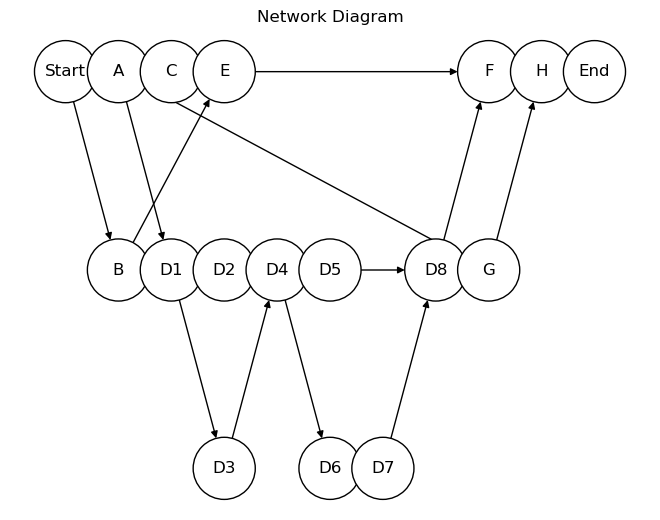

In [4]:
p.plot_network_diagram(plot_type = 'nx')

In [5]:
p.create_project_dict()
out_df = pd.DataFrame(p.PROJECT).T

In [6]:
out_df

,idx,description,duration,precedence,resources,cost
Start,0,Start of Project,0,None,[0],0
A,1,Describe product,0.25,[Start],[0],0
B,2,Develop marketing strategy,0.5,[Start],[0],0
C,3,Design brochure,0.75,[A],[0],0
D1,4,Requirements analysis,10.0,[A],[0],0
D2,5,Software design,15.0,[D1],[0],0
D3,6,System design,15.0,[D1],[0],0
D4,7,Coding,90.0,"[D2, D3]",[0],0
D5,8,Write documentation,10.0,[D4],[0],0
D6,9,Unit testing,20.0,[D4],[0],0


In [7]:
p.CPM(verbose=True)

FORWARD PASS...

Current task on the iteration = [Start]
The precedence constraints of activity Start are = None
The activity is the [Start] so we continue to the next one, since its start and finish are equal to 0
----------------------------------------------------------------------------------------------------
Current task on the iteration = [A]
The precedence constraints of activity A are = ['Start']
The finish dates of the precedence constraints of activity [A] are = [0]
The start date of activity [A] is the maximun of the finish dates of its precedence constraints which is equal to (0)
The finish date of activity [A] is then the start:(0) plus the duration:(0.25) so the finish date is equal to (0.25)
----------------------------------------------------------------------------------------------------
Current task on the iteration = [B]
The precedence constraints of activity B are = ['Start']
The finish dates of the precedence constraints of activity [B] are = [0]
The start date o

,ES,EF,LS,LF,F,D
Start,0,0,0.0,0.0,0,0
A,0,0.25,0.0,0.25,0.0,0.25
B,0,0.5,159.75,160.25,159.75,0.5
C,0.25,1.0,159.5,160.25,159.25,0.75
D1,0.25,10.25,0.25,10.25,0.0,10.0
D2,10.25,25.25,10.25,25.25,0.0,15.0
D3,10.25,25.25,10.25,25.25,0.0,15.0
D4,25.25,115.25,25.25,115.25,0.0,90.0
D5,115.25,125.25,145.25,155.25,30.0,10.0
D6,115.25,135.25,115.25,135.25,0.0,20.0


In [8]:
pd.DataFrame(p.cpm_schedule).T

,ES,EF,LS,LF,F,D,IS,TS,NUM_IS,NUM_TS,idx,D_IS,SUM_D_IS,SUM_RES_IS,SUM_RES_TS,GRPW
Start,0,0,0.0,0.0,0,0,"[A, B]","[D1, D8, H, G, C, E, B, D5, D6, D7, D3, A, F, ...",2,15,0,"[0.25, 0.5]",0.75,0,0,0.75
A,0,0.25,0.0,0.25,0.0,0.25,"[C, D1, G]","[D1, D8, H, G, C, E, D6, D5, D7, D3, F, D4, D2]",3,13,1,"[0.75, 10.0, 2.0]",12.75,0,0,13.0
B,0,0.5,159.75,160.25,159.75,0.5,[E],"[F, E, H]",1,3,2,[5.0],5.0,0,0,5.5
C,0.25,1.0,159.5,160.25,159.25,0.75,[E],"[F, E, H]",1,3,3,[5.0],5.0,0,0,5.75
D1,0.25,10.25,0.25,10.25,0.0,10.0,"[D2, D3]","[D8, H, G, D6, D5, D7, D3, F, D4, D2]",2,10,4,"[15.0, 15.0]",30.0,0,0,40.0
D2,10.25,25.25,10.25,25.25,0.0,15.0,[D4],"[D8, H, G, D6, D5, D7, F, D4]",1,8,5,[90.0],90.0,0,0,105.0
D3,10.25,25.25,10.25,25.25,0.0,15.0,[D4],"[D8, H, G, D6, D5, D7, F, D4]",1,8,6,[90.0],90.0,0,0,105.0
D4,25.25,115.25,25.25,115.25,0.0,90.0,"[D5, D6]","[D8, H, G, D6, D5, D7, F]",2,7,7,"[10.0, 20.0]",30.0,0,0,120.0
D5,115.25,125.25,145.25,155.25,30.0,10.0,[D8],"[G, F, D8, H]",1,4,8,[10.0],10.0,0,0,20.0
D6,115.25,135.25,115.25,135.25,0.0,20.0,[D7],"[D8, H, G, D7, F]",1,5,9,[20.0],20.0,0,0,40.0


In [9]:
p.get_critical_path()

['Start', 'A', 'D1', 'D2', 'D3', 'D4', 'D6', 'D7', 'D8', 'F', 'H', 'End']

In [10]:
from pulp import LpProblem, LpMinimize, LpVariable, LpStatus
import matplotlib.pyplot as plt

In [11]:
file_path = 'project-plan-v003.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [12]:
# Task information
tasks = df['taskID'].dropna().tolist()
expected_hours = df.set_index('taskID')['expectedHours'].fillna(0).to_dict()  # Replace NaN with 0 (due to the "D" task of develop product prototype)
predecessors = df.set_index('taskID')['predecessorTaskIDs'].dropna().to_dict()

In [13]:
# Linear programming model
model = LpProblem('Project_Scheduling', LpMinimize)

In [14]:
# Decision variables: Start times for each task
start_times = {task: LpVariable(f"start_{task}", lowBound=0) for task in tasks}

In [15]:
# Completion time variable
completion_time = LpVariable('completion_time', lowBound=0)

In [16]:
# Objective function: Minimize total project duration
model += completion_time, 'Minimize_Project_Completion_Time'

In [17]:
# Constraints: task predecessors
for task, preds in predecessors.items():
    if isinstance(preds, str):  # Handling multiple dependencies within the predecessors
        preds = preds.split(', ')
    else:
        preds = [preds]
    for pred in preds:
        if pred in tasks:  # Ensure predecessor is a valid task
            model += start_times[task] >= start_times[pred] + expected_hours.get(pred, 0)

In [18]:
# Constraint: Completion time must be at least as large as the latest finish time
for task in tasks:
    model += completion_time >= start_times[task] + expected_hours.get(task, 0)

In [19]:
# Solve the model
model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/albertlee/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/cz/l5s8bjb52v555tv67llq0j1c0000gn/T/0f30b1049e8a4849a1dd803da7e3392a-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/cz/l5s8bjb52v555tv67llq0j1c0000gn/T/0f30b1049e8a4849a1dd803da7e3392a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 40 COLUMNS
At line 112 RHS
At line 148 BOUNDS
At line 149 ENDATA
Problem MODEL has 35 rows, 17 columns and 70 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-35) rows, 0 (-17) columns and 0 (-70) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 1378
After Postsolve, objective 1378, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 1378 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions

1

In [20]:
# Extract results
schedule_results = {task: start_times[task].varValue for task in tasks}
completion_time_value = completion_time.varValue

In [21]:
# Convert results into a DataFrame for visualization
schedule_df = pd.DataFrame(list(schedule_results.items()), columns=['Task', 'Start Time'])
schedule_df['Duration'] = schedule_df['Task'].map(expected_hours)
schedule_df['Completion Time'] = schedule_df['Start Time'] + schedule_df['Duration']

In [22]:
# Display results
print('\nOptimal Project Schedule:')
print(schedule_df)
print(f'\nTotal Project Completion Time: {completion_time_value} hours')
print(f'Solver Status: {LpStatus[model.status]}')


Optimal Project Schedule:
   Task  Start Time  Duration  Completion Time
0     A         0.0       2.0              2.0
1     B         0.0       4.0              4.0
2     C         2.0       6.0              8.0
3     D         0.0       0.0              0.0
4    D1         2.0      80.0             82.0
5    D2        82.0     120.0            202.0
6    D3        82.0     120.0            202.0
7    D4       202.0     720.0            922.0
8    D5       922.0      80.0           1002.0
9    D6       922.0     160.0           1082.0
10   D7      1082.0     160.0           1242.0
11   D8      1242.0      80.0           1322.0
12    E         8.0      40.0             48.0
13    F      1322.0      32.0           1354.0
14    G      1322.0      16.0           1338.0
15    H      1354.0      24.0           1378.0

Total Project Completion Time: 1378.0 hours
Solver Status: Optimal


In [23]:
file_path = 'project-plan-v003.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [24]:
# Function to solve LP model for different time estimates
def solve_project_scheduling(time_column):
    tasks = df['taskID'].dropna().tolist()
    task_times = df.set_index('taskID')[time_column].fillna(0).to_dict()  # Use given time estimates
    predecessors = df.set_index('taskID')['predecessorTaskIDs'].dropna().to_dict()

    # Linear programming model
    model = LpProblem(f"Project_Scheduling_{time_column}", LpMinimize)

    # Decision variables: Start times for each task
    start_times = {task: LpVariable(f"start_{task}", lowBound=0) for task in tasks}

    # Completion time variable
    completion_time = LpVariable('completion_time', lowBound=0)

    # Objective function: Minimize total project duration
    model += completion_time, 'Minimize_Project_Completion_Time'

    # Constraints: Task dependencies
    for task, preds in predecessors.items():
        if isinstance(preds, str):   # Handling multiple dependencies within the predecessors
            preds = preds.split(', ')
        else:
            preds = [preds]
        for pred in preds:
            if pred in tasks:  # Ensure predecessor is a valid task
                model += start_times[task] >= start_times[pred] + task_times[pred]

    # Constraint: Completion time must be at least as large as the latest finish time
    for task in tasks:
        model += completion_time >= start_times[task] + task_times[task]

    # Solve the model
    model.solve()

    # Extract results
    schedule_results = {task: start_times[task].varValue for task in tasks}
    completion_time_value = completion_time.varValue

    # Convert results into a DataFrame
    schedule_df = pd.DataFrame(list(schedule_results.items()), columns=['Task', 'Start Time'])
    schedule_df['Duration'] = schedule_df['Task'].map(task_times)
    schedule_df['Completion Time'] = schedule_df['Start Time'] + schedule_df['Duration']

    return schedule_df, completion_time_value, model.status

In [25]:
# Solve for Best-Case, Expected-Case, and Worst-Case Scenarios
best_case_schedule, best_case_time, best_status = solve_project_scheduling('bestCaseHours')
expected_case_schedule, expected_case_time, expected_status = solve_project_scheduling('expectedHours')
worst_case_schedule, worst_case_time, worst_status = solve_project_scheduling('worstCaseHours')

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/albertlee/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/cz/l5s8bjb52v555tv67llq0j1c0000gn/T/e79361780b2c4e52a34e0e534eb24d18-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/cz/l5s8bjb52v555tv67llq0j1c0000gn/T/e79361780b2c4e52a34e0e534eb24d18-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 40 COLUMNS
At line 112 RHS
At line 148 BOUNDS
At line 149 ENDATA
Problem MODEL has 35 rows, 17 columns and 70 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-35) rows, 0 (-17) columns and 0 (-70) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 913
After Postsolve, objective 913, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 913 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions ch

In [26]:
# Display results
print('\nBest-Case Scenario:')
print(best_case_schedule)
print(f'Total Completion Time: {best_case_time} hours')

print('\nExpected-Case Scenario:')
print(expected_case_schedule)
print(f'Total Completion Time: {expected_case_time} hours')

print('\nWorst-Case Scenario:')
print(worst_case_schedule)
print(f'Total Completion Time: {worst_case_time} hours')


Best-Case Scenario:
   Task  Start Time  Duration  Completion Time
0     A         0.0       1.0              1.0
1     B         0.0       2.0              2.0
2     C         1.0       3.0              4.0
3     D         0.0       0.0              0.0
4    D1         1.0      40.0             41.0
5    D2        41.0      80.0            121.0
6    D3        41.0      80.0            121.0
7    D4       121.0     480.0            601.0
8    D5       601.0      40.0            641.0
9    D6       601.0     120.0            721.0
10   D7       721.0     120.0            841.0
11   D8       841.0      40.0            881.0
12    E         4.0      20.0             24.0
13    F       881.0      16.0            897.0
14    G       881.0       8.0            889.0
15    H       897.0      16.0            913.0
Total Completion Time: 913.0 hours

Expected-Case Scenario:
   Task  Start Time  Duration  Completion Time
0     A         0.0       2.0              2.0
1     B         0.0       

In [27]:
# Critical path using a directed graph approach.
def compute_critical_path(schedule_df, predecessors, total_project_time):

    # Create a directed graph
    G = nx.DiGraph()

    # Add tasks as nodes
    for _, row in schedule_df.iterrows():
        G.add_node(row['Task'], duration=row['Duration'])

    # Add edges based on dependencies
    for task, preds in predecessors.items():
        if isinstance(preds, str):
            preds = preds.split(', ')  # Handling multiple dependencies
        else:
            preds = [preds]
        for pred in preds:
            if pred in schedule_df['Task'].values:  # Ensure the predecessor exists
                G.add_edge(pred, task, weight=schedule_df[schedule_df['Task'] == pred]['Duration'].values[0])

    # Compute the longest path (Critical Path)
    longest_path = nx.dag_longest_path(G, weight='weight')

    return longest_path

In [28]:
# Compute the critical path for each scenario
best_case_critical_path = compute_critical_path(best_case_schedule, predecessors, best_case_time)
expected_case_critical_path = compute_critical_path(expected_case_schedule, predecessors, expected_case_time)
worst_case_critical_path = compute_critical_path(worst_case_schedule, predecessors, worst_case_time)

In [29]:
# Display corrected critical paths
print('\nCritical Path (Best Case):', ' → '.join(best_case_critical_path))
print('\nCritical Path (Expected Case):', ' → '.join(expected_case_critical_path))
print('\nCritical Path (Worst Case):', ' → '.join(worst_case_critical_path))


Critical Path (Best Case): A → D1 → D2 → D4 → D6 → D7 → D8 → F → H

Critical Path (Expected Case): A → D1 → D2 → D4 → D6 → D7 → D8 → F → H

Critical Path (Worst Case): A → D1 → D2 → D4 → D6 → D7 → D8 → F → H


In [30]:
# Gantt chart for the project schedule
def plot_gantt_chart(schedule_df, title):

    fig, ax = plt.subplots(figsize=(12, 6))

    # Convert task start times and durations into bars
    y_positions = range(len(schedule_df))
    start_times = schedule_df['Start Time']
    durations = schedule_df['Duration']

    ax.barh(y_positions, durations, left=start_times, color='skyblue', edgecolor='black')

    # Annotate task names
    for i, (task, start, duration) in enumerate(zip(schedule_df['Task'], start_times, durations)):
        ax.text(start + duration / 2, i, task, ha='center', va='center', fontsize=10, color='black', weight='bold')

    # Formatting
    ax.set_yticks(y_positions)
    ax.set_yticklabels(schedule_df['Task'])
    ax.set_xlabel("Time (Hours)")
    ax.set_title(title)
    ax.invert_yaxis()  # Highest priority task at the top

    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

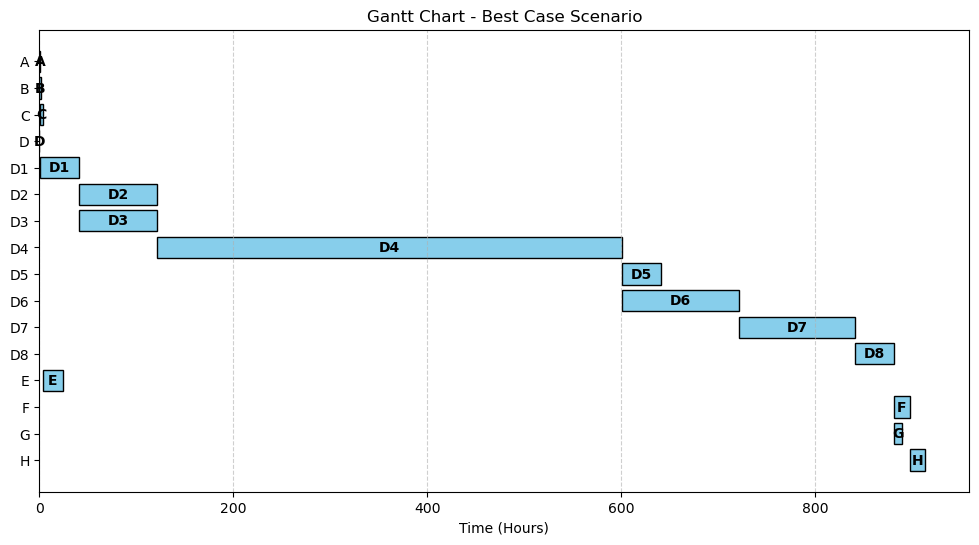

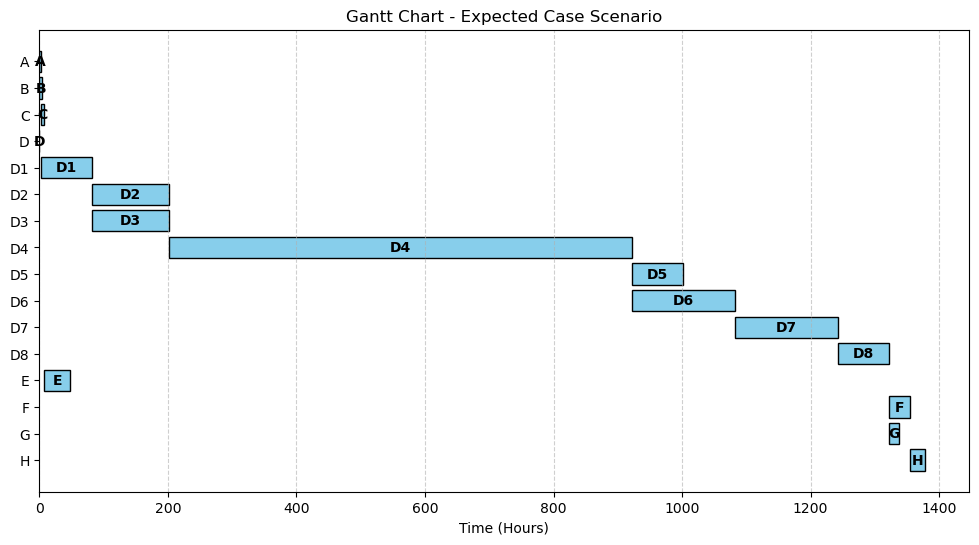

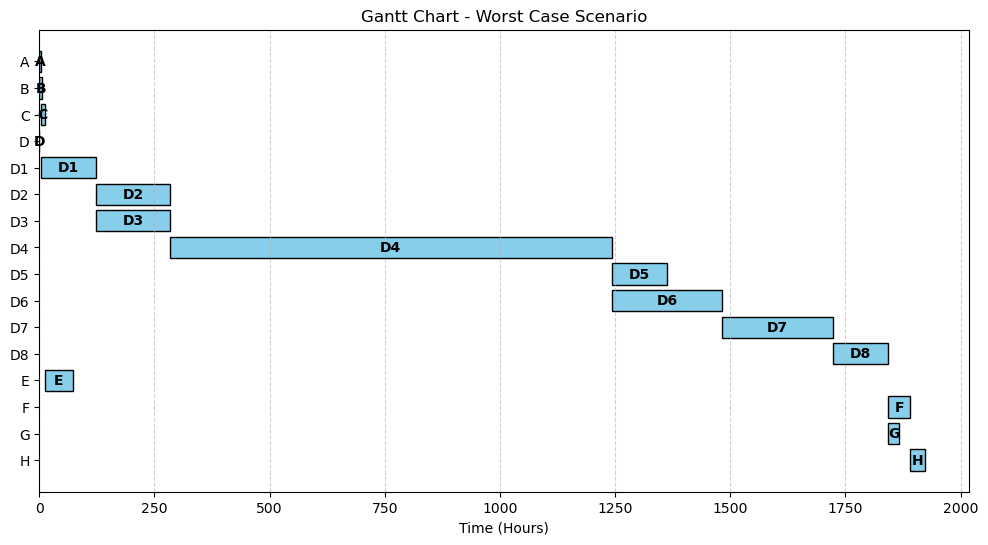

In [31]:
plot_gantt_chart(best_case_schedule, "Gantt Chart - Best Case Scenario")
plot_gantt_chart(expected_case_schedule, "Gantt Chart - Expected Case Scenario")
plot_gantt_chart(worst_case_schedule, "Gantt Chart - Worst Case Scenario")